University of Stirling<br>
Computing Science and Mathematics
#### CSCU9YE - Artificial Intelligence   
## Assignment: Organising a Colour Palette
Group : 25 Student ID : 2636161 , 2636157 , 2634926 
# Clustering Based Algorithm

## Chosen Clustering Algorithm

The algorithm that was used was the kmeans algorithm, the reason that we decided to use this algorithm instead of hierarchical clustering is it resulted in the lowest Euclid distance when using the evaluation function. We found it was better to use because the Kmeans data sets that  are being used are a fixed size, while hieratical is better for data sets that can vary in size. Kmeans is better at identifying outliers which would result in the colour palette being more organized and it also scales better for large data sets than hierarchical, meaning that the results would be more accurate. It also takes less time for k-means to complete the calculations.


## Amount of clusters used for each instance size
The number of clusters K that was used for instance size 100 was 6 and for instance size 500 we used 15 we used these values for both our Kmeans Clustering an Hierarchical Clustering testing. We found that these were good numbers as decreasing the number of clusters below these values will start to increase the Euclid distance of the colours in the palette making the colour pallete look worse and return a high result in the evaluation, we found that when we increase the number of cluster  it will continue to give better evaluation results and improve the look of our colour pallete as having more clusters allows for more colours to be grouped correctly. We found that after increasing the number of clusters by to much it starts to have a negative effect of the evaluation results as it starts to increase the distance between the colours making the colour pallete look worse and increasing the evaluation score.



## Experiments conducted

Implemented both Kmeans clustering and hierarchical then compared how each of them performed using the evaluate function while keeping the number of clusters consistent for both and found that using Kmeans was the best as it resulted in the lowest Euclid distance for both instance 100 and 500.

Experimented with increasing and decreasing the number of clusters for the two algorithms and found that as the number of clusters used for both 100 and 500 instances increases, the Euclid distance from the evaluate function decreases meaning that the colour palette accuracy is improved. Doing this works up to a certain point where increasing the number of clusters will start to increase the Euclid distance. 

When testing hierarchical clustering we experimented with the different linkage methods complete, ward, average and single and found that for instance 100 ward was the best option and for instance 500 we found that complete was the best option as they had the largest effect on reducing the Euclid distance.




Results for Kmeans Clustering

Best solution colour palette for instance 100 Kmeans


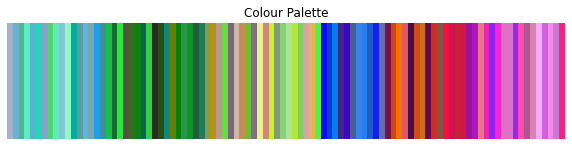

Evaluation 35.5864950668804

Best solution colour palette for instance 500 Kmeans


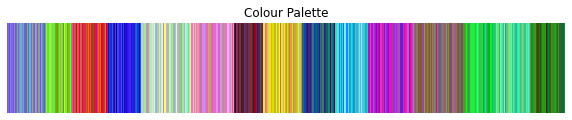

Evaluation 134.77106622373688

Results for Hierarchical Clustering

Best solution colour palette for instance 100 hierarchical


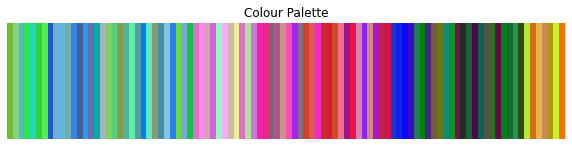

Evaluation 40.686918868734615

Best solution colour palette for instance 500 hierarchical


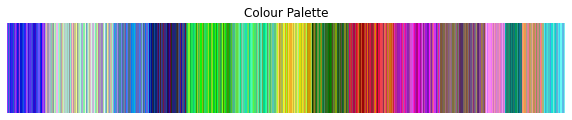

Evaluation 140.64108022910077


In [2]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc     # Used to visualise dendograms
from sklearn.cluster import AgglomerativeClustering 

# Read in the color data file 
# Input: string with file name
# Oputput: the number of colours (integer), and a list numpy arrays with all the colours
def read_data(fname):
    cols = np.loadtxt(fname, skiprows = 4) # The first 4 lines have text information, and are ignored     
    ncols = len(cols)     # Total number of colours and list of colours
    return ncols,cols


# Dsiplay the colors as a strip of color bars
# Input: list of colors, order of colors, and height/ratio
def plot_colors(col_list, col_order, ratio = 10): 
    assert len(col_list) == len(col_order)
    img = np.zeros((ratio, len(col_list), 3))
    for i in range(0, len(col_list)):
        img[:, i, :] = col_list[col_order[i]]
    fig, axes = plt.subplots(1, figsize=(10,6)) # figsize=(width,height) handles window dimensions
    axes.imshow(img, interpolation='nearest')
    axes.axis('off')
    plt.title("Colour Palette")
    plt.show()


def evaluate(cols, ordc):     
    adjacentColPairs = [[cols[ordc[i]],cols[ordc[i-1]]] for i in range(1,len(ordc))]
    return sum([euclid(i[1], i[0]) for i in adjacentColPairs])

# This is an auxiliary function. It calculate the Euclidean distance between two individual colours
# Input: v and u as to be numpy arrays, vectors of real numbers with the RGB coordinates.
def euclid(v, u):
    return np.linalg.norm(v - u)

## function for k means cluster takes in the name of the file used and the amount of clusters that are used
def kMeansClustering(txtFile , numberOfClusters):
    ncolors, colors = read_data(txtFile)
    data = pd.DataFrame({'Red': colors[:, 0], 'Green': colors[:, 1], 'Blue': colors[:, 2]}) # chage the data set used from numpy to pandas data set so we have access to the functions provided by pandas
    order = list(range(ncolors)) # create an array with the size of the number of colours used      
    data_scaled = preprocessing.scale(data) # process the data so that it can be used for clustering 
    data_scaled = pd.DataFrame(data_scaled)  #  change the data set into a data frame so it can be used for clustering
    kmeans = KMeans(n_clusters = numberOfClusters) # creates the model with the number of clusters that were specifed by the user
    clusters = kmeans.fit_predict(data_scaled) # fit the created model that is used for scaled data
    data['Cluster'] = clusters # add a new colum for the clusters 
    data['ColorID'] = order # add a new colum for the colour id
    data = data.sort_values(by=['Cluster']) # organise the data set by the value of the clusters
    cluster_order = data[['ColorID']].to_numpy()# the cluster_order is then converted back into a numpy file    
    return colors,cluster_order

#Function for the Hierarchical clustering takes in the parameters for the text file and number of clusters
def hierarchicalClustering(txtFile , numberOfClusters):
    ncolors, colors = read_data(txtFile)
    data = pd.DataFrame({'Red': colors[:, 0], 'Green': colors[:, 1], 'Blue': colors[:, 2]}) # chage the data set used from numpy to pandas data set so we have access to the functions provided by pandas
    order = list(range(ncolors)) # create an array with the size of the number of colours used        
    data_scaled = preprocessing.scale(data)  
    data_scaled = pd.DataFrame(data_scaled)     
    ac = AgglomerativeClustering(n_clusters=numberOfClusters, linkage='complete')
    agg_clusters = ac.fit_predict(data_scaled)
    data['Agg_Cluster'] = agg_clusters # each element in the data set is assignment a agg cluster
    data['ColorID'] = order # each element is assigned an id
    data = data.sort_values(by=['Agg_Cluster']) # the data set is ordered by the cluster that was assignment to them
    cluster_order = data[['ColorID']].to_numpy() # the cluster_order is then converted back into a numpy file
    return colors,cluster_order



#output the results for KMeans clustering instance size 100
colors, cl_best100 = kMeansClustering("col100.txt",6)
cl_best100Eval = evaluate(colors, cl_best100)
print("Results for Kmeans Clustering")
print("\nBest solution colour palette for instance 100 Kmeans")
plot_colors(colors, cl_best100, 20)
print("Evaluation", cl_best100Eval)


#output the results for KMeans clustering instance size 500
colors, cl_best500 = kMeansClustering("col500.txt",15)
cl_best500Eval = evaluate(colors, cl_best500)
print("\nBest solution colour palette for instance 500 Kmeans")
plot_colors(colors, cl_best500, 80)
print("Evaluation", cl_best500Eval)

#output the results for hierarachical clustering instance size 100
colors, cl_best100 = hierarchicalClustering("col100.txt",6)
hierar_best100Eval = evaluate(colors, cl_best100)
print("\nResults for Hierarchical Clustering")
print("\nBest solution colour palette for instance 100 hierarchical")
plot_colors(colors, cl_best100, 20)
print("Evaluation", hierar_best100Eval)

#output the results for hierarachical clustering instance size 500
colors, cl_best500 = hierarchicalClustering("col500.txt",15)
hierar_best500Eval = evaluate(colors, cl_best500)
print("\nBest solution colour palette for instance 500 hierarchical")
plot_colors(colors, cl_best500, 80)
print("Evaluation", hierar_best500Eval)

